In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
online_retail_df_url = 'https://raw.githubusercontent.com/nyangweso-rodgers/data-analytics/refs/heads/main/01-datasets/03-online-retail.csv'
online_retail_df = pd.read_csv(online_retail_df_url, encoding='unicode_escape')

# print shape of the data
print(f"online_retail_df shape: {online_retail_df.shape}")

online_retail_df.head()

online_retail_df shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom


## Step : Rename Columns

In [4]:
# Define the dictionary for renaming columns
new_column_names = {
    'InvoiceDate': 'InvoiceDateTime',
}

def rename_columns(df, new_column_names):
    """
    Renames columns in the DataFrame based on the provided dictionary.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    new_column_names (dict): Dictionary with current column names as keys and new names as values.
    
    Returns:
    pd.DataFrame: A DataFrame with renamed columns.
    """

    # Rename columns based on the new_column_names dictionary
    return df.rename(columns=new_column_names)

renamed_online_retail_df = rename_columns(online_retail_df, new_column_names)
renamed_online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom


__Explanation__
- `df.rename(columns=new_column_names)` function renames the columns as per the provided dictionary without modifying the original DataFrame (since Pandas' rename() returns a new DataFrame unless inplace=True is used).

## Step: Validate Data Types

In [5]:
def check_data_types(df):
    """
    Prints the data types of all columns in the DataFrame.
    """
    for col in df.columns:
        print(f"{col}: {df[col].dtype}")

# usage
check_data_types(renamed_online_retail_df)

InvoiceNo: object
StockCode: object
Description: object
Quantity: int64
InvoiceDateTime: object
UnitPrice: float64
CustomerID: float64
Country: object


__Explanation__
1. `for col in df.columns`: Iterates over the column names, ensuring clear and correct terminology.
2. `df[col].dtype`: Retrieves the data type of each column.

## Step: Transform (Change) Data Types

In [6]:
# Specify the column(s) and their desired data types
dtype_dict = {
    'InvoiceDateTime': 'datetime64[ns]',
    'CustomerID': str
}
def convert_data_types(df, dtype_dict):
    """
    Converts specified columns to the desired data types.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    dtype_dict (dict): A dictionary where keys are column names and values are target data types.
    
    Returns:
    pd.DataFrame: A DataFrame with updated data types.
    """
    df = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
    for col, dtype in dtype_dict.items():
        try:
            if dtype in [float, int]:
                # Use pd.to_numeric for numeric conversions
                df[col] = pd.to_numeric(df[col], errors='coerce').astype(dtype)
            else:
                # Use astype directly for non-numeric types
                df[col] = df[col].astype(dtype)
            print(f"Successfully converted '{col}' to {dtype}.")
        except Exception as e:
            print(f"Error converting '{col}' to {dtype}: {e}")
    return df

df_with_correct_data_types = convert_data_types(renamed_online_retail_df, dtype_dict)
check_data_types(df_with_correct_data_types)

Successfully converted 'InvoiceDateTime' to datetime64[ns].
Successfully converted 'CustomerID' to <class 'str'>.
InvoiceNo: object
StockCode: object
Description: object
Quantity: int64
InvoiceDateTime: datetime64[ns]
UnitPrice: float64
CustomerID: object
Country: object


## Step: Check For `null` , or `nan` Values

In [7]:
def check_null_values(df):
    """
    Function to check for null values in each column of the DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame to check for null values.
    
    Returns:
    None
    """
    # Coerce 'nan' strings and other non-standard NaNs to np.nan
    df = df.replace('nan', np.nan)
    
    # Check for empty DataFrame to avoid division by zero
    total_rows = len(df) 
    if total_rows == 0:
        print("The DataFrame is empty.")
        return pd.DataFrame(columns=['Feature', 'Count of Null Values', 'Percentage of Null Values'])
    # Calculate null counts and percentages
    null_counts = df.isnull().sum()
    null_percentage = (null_counts / total_rows) * 100
    
    # Create a DataFrame summarizing null values
    null_df = pd.DataFrame({
        'Feature': null_counts.index,
        'Count of Null Values': null_counts.values,
        'Percentage of Null Values': null_percentage.values.round(2),
    })
    # Print shape of the DataFrame dynamically
    print(f"DataFrame shape: {df.shape}")
    
    return null_df

# Check for null values in the DataFrame and get the result as a DataFrame
null_values_df = check_null_values(df_with_correct_data_types)

# Display the resulting DataFrame
null_values_df

DataFrame shape: (541909, 8)


,Feature,Count of Null Values,Percentage of Null Values
0,InvoiceNo,0,0.00
1,StockCode,0,0.00
2,Description,1454,0.27
3,Quantity,0,0.00
4,InvoiceDateTime,0,0.00
5,UnitPrice,0,0.00
6,CustomerID,135080,24.93
7,Country,0,0.00


## Step : Handling `null` Values

### Step : Remove `null` and `nan` Values

In [8]:
def remove_null_rows(df, columns_to_check, verbose=True):
    """
    Function to remove rows with null values in specified columns.

    Parameters:
    df (pandas.DataFrame): The DataFrame to clean.
    columns_to_check (list): List of columns to check for null values.

    Returns:
    pandas.DataFrame: A DataFrame with rows containing null values in the specified columns removed.
    """
    # Ensure the columns to check exist in the DataFrame
    missing_cols = [col for col in columns_to_check if col not in df.columns]
    if missing_cols:
        raise ValueError(f"The following columns are not in the DataFrame: {missing_cols}")
    
    # Replace non-standard null values (e.g., 'nan' as a string) with np.nan
    df = df.replace('nan', np.nan)
    
    if verbose:
        print(f"Original DataFrame shape: {df.shape}")
        
    # Drop rows with null values in the specified columns
    cleaned_df = df.dropna(subset=columns_to_check)
    
    if verbose:
        print(f"Cleaned DataFrame shape: {cleaned_df.shape}")
    
    # Handle case where the DataFrame becomes empty
    if cleaned_df.empty:
        print("Warning: The cleaned DataFrame is empty after removing rows with null values.")

    return cleaned_df

# Specify the columns to check for null values (adjust as needed)
columns_to_check = ['CustomerID', 'Description']

# Remove rows with null values in the specified columns and save the result in a new DataFrame
df_without_nulls = remove_null_rows(df_with_correct_data_types, columns_to_check)

# Display the resulting DataFrame
df_without_nulls.head()

Original DataFrame shape: (541909, 8)
Cleaned DataFrame shape: (406829, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Step : Check For Negative Values

In [9]:
def display_negative_values(df, columns_to_check, return_df=False):
    """
    Function to display rows with negative values in specified columns 
    and count the number of such rows for each column.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check.
    columns_to_check (list): List of columns to check for negative values.
    return_df (bool): Whether to return the DataFrame with negative values.

    Returns:
    pandas.DataFrame (optional): A DataFrame with rows containing negative values 
    in the specified columns (if return_df=True).
    """
    # Validate column existence
    for col in columns_to_check:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")

    # Dictionary to store column-wise negative value counts
    negative_counts = {}
    
    # Identify and count rows with negative values for each column
    for col in columns_to_check:
        negative_rows = df[df[col] < 0]
        negative_counts[col] = negative_rows.shape[0]
        print(f"Column '{col}' has {negative_rows.shape[0]} rows with negative values.")
    
    # Identify rows with negative values in any of the specified columns
    negative_values_df = df[df[columns_to_check].lt(0).any(axis=1)]
    
    # Print total rows with negative values across the specified columns
    print(f"\nTotal rows with negative values in any specified column: {negative_values_df.shape[0]}")
    
    # Optionally return the DataFrame with negative values
    if return_df:
        return negative_values_df

# Example usage:
columns_to_check_negative = ['Quantity', 'UnitPrice']
negatives = display_negative_values(df_without_nulls, columns_to_check_negative, return_df=True)

Column 'Quantity' has 8905 rows with negative values.
Column 'UnitPrice' has 0 rows with negative values.

Total rows with negative values in any specified column: 8905


## Step : Remove Negative Rows

In [10]:
def remove_negative_values(df, columns_to_check):
    """
    Function to remove rows with negative values in the specified columns 
    and return a new DataFrame. It logs the number of rows removed for each column.

    Parameters:
    df (pandas.DataFrame): The original DataFrame.
    columns_to_check (list): List of columns to check for negative values.

    Returns:
    pandas.DataFrame: A new DataFrame with rows containing negative values removed.
    """
    # Validate column existence
    for col in columns_to_check:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")
    
    # Initialize total rows for logging
    initial_rows = df.shape[0]

    # Dictionary to store the number of rows deleted for each column
    rows_deleted_per_column = {}

    # Identify and log rows with negative values for each column
    for col in columns_to_check:
        negative_rows = df[df[col] < 0]
        rows_deleted_per_column[col] = negative_rows.shape[0]
        print(f"Column '{col}' had {negative_rows.shape[0]} rows with negative values.")

    # Remove rows with negative values in any of the specified columns
    cleaned_df = df[~df[columns_to_check].lt(0).any(axis=1)]

    # Calculate total rows removed
    rows_removed = initial_rows - cleaned_df.shape[0]

    # Log the summary
    print(f"\nTotal rows removed: {rows_removed}")
    print(f"New DataFrame after removing negative values has {cleaned_df.shape[0]} rows.")

    return cleaned_df

# Example usage:
columns_to_check_negative = ['Quantity', 'UnitPrice']
df_cleaned = remove_negative_values(df_without_nulls, columns_to_check_negative)


Column 'Quantity' had 8905 rows with negative values.
Column 'UnitPrice' had 0 rows with negative values.

Total rows removed: 8905
New DataFrame after removing negative values has 397924 rows.


__Exaplanation__
- It uses `df[columns_to_check].lt(0).any(axis=1)` to identify rows with negative values in any of the specified columns.
- The `~` operator negates the condition to keep only rows without negative values.

## Step : Feature Engineering

* From our data preview, we can generate the following fields:
    - `TotalAmount` = `Quantity` x `UnitPrice`
    - `Date` - extracted from the `InvoiceDate` fields
    - `DayOfWeek` from the `Date` 

In [11]:
def feature_engineering(df):
    """
    Function to perform feature engineering on the DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to process.

    Returns:
    pandas.DataFrame: The DataFrame with additional features.
    """
    # Make a copy of the DataFrame to avoid modifying the original
    df = df.copy()

    # Ensure necessary columns exist
    required_columns = ['InvoiceDateTime', 'UnitPrice', 'Quantity']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Handle missing values in InvoiceDateTime, UnitPrice, and Quantity
    df = df.dropna(subset=required_columns)

    # Extract the date from InvoiceDateTime
    df['InvoiceDate'] = df['InvoiceDateTime'].dt.date

    # Calculate InvoiceAmount as the product of UnitPrice and Quantity
    df['InvoiceAmount'] = df['UnitPrice'] * df['Quantity']

    # Extract the day of the week (using dt accessor for better performance)
    df['InvoiceDayOfWeek'] = df['InvoiceDateTime'].dt.day_name()

    # Create InvoiceMonth column (using dt accessor for better performance)
    df['InvoiceMonth'] = df['InvoiceDateTime'].dt.to_period('M').dt.to_timestamp()

    return df

# Perform feature engineering on the cleaned DataFrame
enhanced_df = feature_engineering(df_cleaned)
enhanced_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,InvoiceAmount,InvoiceDayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,Wednesday,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,Wednesday,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,Wednesday,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,Wednesday,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,Wednesday,2010-12-01


## Step : Descriptive Statistics

In [12]:
# descriptive statistics function
def descriptive_statistic(df):
    # Specifying datetime_is_numeric=True adopts the future behavior of Treating datetime data as categorical rather than numeric
    return df.describe(include='all')
 

descriptive_statistic(enhanced_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,InvoiceAmount,InvoiceDayOfWeek,InvoiceMonth
count,397924,397924,397924,397924.000000,397924,397924.000000,397924,397924,397924,397924.000000,397924,397924
unique,18536,3665,3877,NaN,NaN,NaN,4339,37,305,NaN,6,NaN
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,17841.0,United Kingdom,2011-11-06,NaN,Thursday,NaN
freq,542,2035,2028,NaN,NaN,NaN,7847,354345,3423,NaN,80052,NaN
mean,NaN,NaN,NaN,13.021823,2011-07-10 23:43:36.912475648,3.116174,NaN,NaN,NaN,22.394749,NaN,2011-06-26 09:28:46.267327488
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.000000,NaN,NaN,NaN,0.000000,NaN,2010-12-01 00:00:00
25%,NaN,NaN,NaN,2.000000,2011-04-07 11:12:00,1.250000,NaN,NaN,NaN,4.680000,NaN,2011-04-01 00:00:00
50%,NaN,NaN,NaN,6.000000,2011-07-31 14:39:00,1.950000,NaN,NaN,NaN,11.800000,NaN,2011-07-01 00:00:00
75%,NaN,NaN,NaN,12.000000,2011-10-20 14:33:00,3.750000,NaN,NaN,NaN,19.800000,NaN,2011-10-01 00:00:00
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,8142.750000,NaN,NaN,NaN,168469.600000,NaN,2011-12-01 00:00:00


### Step : Descriptive Statistics By Customer

In [14]:
def summary_by_customer(df):
    # Ensure necessary columns exist
    required_columns = ['InvoiceNo', 'InvoiceAmount', 'StockCode', 'Description']
    
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")
        
    # Group by country and calculate required statistics
    summary_by_customer = df.groupby(['Country', 'CustomerID', 'InvoiceMonth', 'InvoiceDate']).agg(
        TotalInvoiceAmount=('InvoiceAmount', 'sum'),
        InvoicesCount=('InvoiceNo', 'nunique'),
        StockCodeCount=('StockCode', 'nunique'),
        ProductsDescriptionCount=('Description', 'nunique')
    ).reset_index()
    
    return summary_by_customer

customer_summary_df = summary_by_customer(enhanced_df)
customer_summary_df

,Country,CustomerID,InvoiceMonth,InvoiceDate,TotalInvoiceAmount,InvoicesCount,StockCodeCount,ProductsDescriptionCount
0,Australia,12386.0,2010-12-01,2010-12-08,258.90,1,8,8
1,Australia,12386.0,2011-01-01,2011-01-06,143.00,1,2,2
2,Australia,12388.0,2011-01-01,2011-01-17,431.30,1,19,19
3,Australia,12388.0,2011-02-01,2011-02-07,124.05,1,6,6
4,Australia,12388.0,2011-03-01,2011-03-09,210.90,1,10,10
...,...,...,...,...,...,...,...,...
16761,Unspecified,12743.0,2011-07-01,2011-07-28,546.43,2,114,114
16762,Unspecified,14265.0,2011-07-01,2011-07-14,252.05,1,15,15
16763,Unspecified,14265.0,2011-08-01,2011-08-22,278.13,1,16,16
16764,Unspecified,16320.0,2011-05-01,2011-05-10,852.68,1,47,47


## Step : Create RFM Table
1. Calculate Recency: The number of days since the customer's last purchase.
2. Calculate Frequency: The total number of purchases made by the customer.
3. Calculate Monetary: The total amount spent by the customer.

In [18]:
def create_rfm_table(df):
    
    # get first and last invoice date
    print(f"First Invoice Date: {df['InvoiceDate'].min()}")
    print(f"Last Invoice Date: {df['InvoiceDate'].max()}")

    # get today's date from the last invoice date
    todays_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
    print(f"Today's Date: {todays_date}")

    # Calculate Recency, Frequency, and Monetary values
    rfm_table = df.groupby(['CustomerID', 'Country']).agg(
        Recency=pd.NamedAgg(column='InvoiceDate', aggfunc=lambda x: (todays_date - x.max()).days),
        Frequency=pd.NamedAgg(column='InvoicesCount', aggfunc='sum'),
        MonetaryValue=pd.NamedAgg(column='TotalInvoiceAmount', aggfunc='sum')
    ).reset_index()

    print(f"RFM Table DataFrame Shape : {rfm_table.shape}")

    return rfm_table

# Perform RFM calculation on the dataset
rfm_table = create_rfm_table(customer_summary_df)
rfm_table.head()

First Invoice Date: 2010-12-01
Last Invoice Date: 2011-12-09
Today's Date: 2011-12-10
RFM Table DataFrame Shape : (4347, 5)


,CustomerID,Country,Recency,Frequency,MonetaryValue
0,12346.0,United Kingdom,326,1,77183.60
1,12347.0,Iceland,3,7,4310.00
2,12348.0,Finland,76,4,1797.24
3,12349.0,Italy,19,1,1757.55
4,12350.0,Norway,311,1,334.40


__Explanation__
- Here:
  - Get the _First Invoice Date_ and _Last Invoice Date_ from the dataset.
  -  We will use the _Last Sales Date_ in the calculation of __RECENCY__. 
  -  Create a Function to Define Recency and Tenure
     -  Recency is calculated using the InvoiceDate column to determine the number of days since the last purchase.
     -  Frequency is calculated using the InvoiceDate column to count the number of unique purchase dates.
     -  Monetary is calculated using the TotalInvoiceAmount column to sum the total amount spent.

## Step : Get RFM Segments
* The next thing we need to do is to segment the __recency__, __frequency__, and __total_value__ into the categories.
* For our use case, we can split each feature into 4 quartiles that roughly divide the sample into 4 segments of equal proportion. 
* We have called these scores __R__, __F__, and __M__ respectively.

To segment customers based on their RFM scores, we can divide each of the RFM metrics into quartiles. Customers will be assigned a score from 1 to 4 for each metric, with 4 being the highest (most recent, most frequent, highest monetary value) and 1 being the lowest. This segmentation will help in categorizing customers into different groups based on their purchasing behavior.

Here's how you can achieve this:
1. Calculate RFM Quartiles: Split the RFM metrics into quartiles and assign scores.
2. Combine RFM Scores: Create a combined RFM score for each customer.

In [19]:
def assign_rfm_scores(rfm_table):
    RFM_Segments = rfm_table

    # Recency Quartile Segmentation
    r_labels = range( 4, 0, -1)
    Recency = rfm_table['Recency']
    r_quartiles, bins = pd.qcut(Recency, 4, labels=r_labels, retbins=True)
    RFM_Segments = RFM_Segments.assign(R_Quartile = r_quartiles.values)

    # Frequency Quartile Segmentation
    f_labels = range(1, 5)
    Frequency = rfm_table['Frequency'].rank(method='first') # rank to deal with duplicate values
    f_quartiles, bins = pd.qcut(Frequency, 4, labels=f_labels, retbins=True)
    RFM_Segments = RFM_Segments.assign(F_Quartile = f_quartiles.values)

    # Monetary Value Quartile Segmentation
    m_labels = range(1, 5)
    MonetaryValue = rfm_table['MonetaryValue']
    m_quartiles, bins = pd.qcut(MonetaryValue, 4, labels=m_labels, retbins=True)
    RFM_Segments = RFM_Segments.assign(M_Quartile = m_quartiles.values)

    # 
    RFM_Segments['RFMClass'] = RFM_Segments["R_Quartile"].astype(str) + RFM_Segments["F_Quartile"].astype(str) + RFM_Segments['M_Quartile'].astype(str)
    RFM_Segments['RFMScore'] = RFM_Segments["R_Quartile"].astype(int) + RFM_Segments["F_Quartile"].astype(int) + RFM_Segments['M_Quartile'].astype(int)
    
    return RFM_Segments

# Apply the RFM segmentation
RFM_Segments = assign_rfm_scores(rfm_table)
RFM_Segments.head()

,CustomerID,Country,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore
0,12346.0,United Kingdom,326,1,77183.60,1,1,4,114,6
1,12347.0,Iceland,3,7,4310.00,4,4,4,444,12
2,12348.0,Finland,76,4,1797.24,2,3,4,234,9
3,12349.0,Italy,19,1,1757.55,3,1,4,314,8
4,12350.0,Norway,311,1,334.40,1,1,2,112,4


__Explanations__
#### Recency Quartile Segmentation:
- `r_labels`: This creates labels for the recency quartiles, ranging from 4 (most recent) to 1 (least recent).
- `Recency`: This extracts the Recency column from the rfm_table.
- `pd.qcut`: This function divides the Recency values into 4 quartiles based on their distribution. It assigns labels from r_labels and also returns the bin separators (bins) for future reference.
- `RFM_Segments.assign(R_Quartile = r_quartiles.values)`: This adds a new column named R_Quartile to the RFM_Segments DataFrame and assigns the calculated quartile values to it.

#### Frequency Quartile Segmentation
- Similar to recency, this section segments customers based on purchase frequency.
- `f_labels`: This creates labels for the frequency quartiles, ranging from 1 (least frequent) to 4 (most frequent).
- `Frequency.rank(method='first')`: This ranks the Frequency values. Ranking is used to handle cases where multiple customers might have the same frequency value. The method='first' ensures consistent ranking for ties.
- `pd.qcut` divides the ranked Frequency values into 4 quartiles with labels and bins.
- A new column `F_Quartile` is added to RFM_Segments and assigned the quartile values.

#### Monetary Value Quartile Segmentation:
- Similar to the previous sections, this segments customers based on their total monetary value.
- `m_labels`: This creates labels for the monetary value quartiles, ranging from 1 (lowest value) to 4 (highest value).
- `MonetaryValue`: This extracts the `MonetaryValue` column from the data.
- `pd.qcut` divides the MonetaryValue into 4 quartiles with labels and bins.
- A new column `M_Quartile` is added to `RFM_Segments` and assigned the quartile values.

### RFM Class and Score Calculation:
- `RFMClass`: This creates a new column named `RFMClass` by concatenating the string representations of the R, F, and M quartiles. This provides a combined RFM segment label (e.g., "432" for a customer in the highest recency quartile, 3rd frequency quartile, and 2nd monetary value quartile).
- `RFMScore`: This creates a new column named RFMScore by summing the integer representations of the R, F, and M quartiles. This provides a single score representing the overall RFM segmentation (e.g., 9 for the customer in the previous example).

## Step : Defining RFM Tiers
* We can further divide the customers into __RFM Tiers__ by binning together ranges of scores. 
* For example, we can say that customers with scores ranging from 3 to 5 are Bronze, from 5 to 9 are Silver and from 9 to 12 are Gold.

In [20]:
 # group customers into different Tiers
def get_tier(df):
    if df['RFMScore'] >= 9:
        return 'GOLD'
    elif (df['RFMScore'] >= 5) and (df['RFMScore'] < 9):
        return 'SILVER'
    else:
        return "BRONZE"
    
RFM_Segments['Tier'] = RFM_Segments.apply(get_tier, axis=1)
RFM_Segments

,CustomerID,Country,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore,Tier
0,12346.0,United Kingdom,326,1,77183.60,1,1,4,114,6,SILVER
1,12347.0,Iceland,3,7,4310.00,4,4,4,444,12,GOLD
2,12348.0,Finland,76,4,1797.24,2,3,4,234,9,GOLD
3,12349.0,Italy,19,1,1757.55,3,1,4,314,8,SILVER
4,12350.0,Norway,311,1,334.40,1,1,2,112,4,BRONZE
...,...,...,...,...,...,...,...,...,...,...,...
4342,18280.0,United Kingdom,278,1,180.60,1,2,1,121,4,BRONZE
4343,18281.0,United Kingdom,181,1,80.82,1,2,1,121,4,BRONZE
4344,18282.0,United Kingdom,8,2,178.05,4,3,1,431,8,SILVER
4345,18283.0,United Kingdom,4,16,2094.88,4,4,4,444,12,GOLD


## Step : Get Distribution of Customers under Different Tiers

In [21]:
RFM_Segments['Tier'].value_counts()

Tier
SILVER    1859
GOLD      1677
BRONZE     811
Name: count, dtype: int64

## Step : Check For Feature Correlations

In [22]:
def get_feature_correlation(df):
    rfm_table_df = df[['CustomerID', 'Recency', 'Frequency', 'MonetaryValue']]
    rfm_table_df.set_index('CustomerID', inplace=True)

    # generate a featire correlation matrix
    rfm_corr = rfm_table_df.corr()
    return rfm_corr
get_feature_correlation(RFM_Segments)

,Recency,Frequency,MonetaryValue
Recency,1.000000,-0.260616,-0.122215
Frequency,-0.260616,1.000000,0.554108
MonetaryValue,-0.122215,0.554108,1.000000


### Correlation Coefficients Explained
- Correlation Coefficient (r):
  - Ranges from -1 to 1.
  - 1: Perfect positive correlation (as one variable increases, the other also increases).
  - -1: Perfect negative correlation (as one variable increases, the other decreases).
  - 0: No correlation (no linear relationship between the variables).

## Step : Generate and Plot the Heatmap

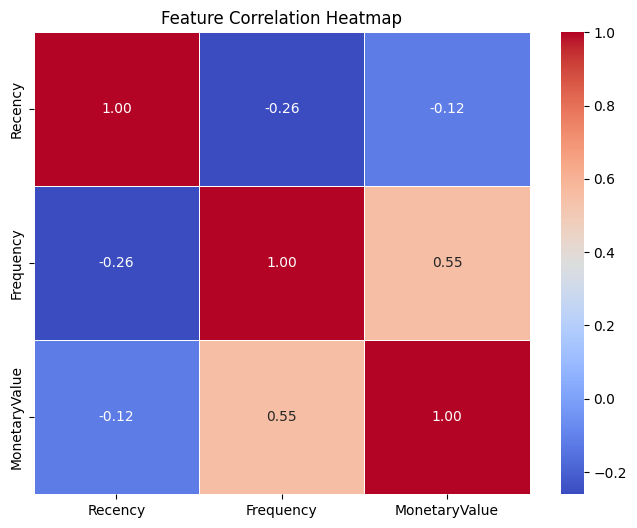

In [23]:
def plot_feature_correlation_heatmap(df, features):
    """
    Function to plot a heatmap of feature correlations.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the features to be correlated.
    features (list): A list of feature names to include in the correlation matrix.

    Returns:
    None
    """
    # Create the feature correlation matrix
    correlation_matrix = df[features].corr()

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title('Feature Correlation Heatmap')
    plt.show()

# Example usage
features = ['Recency', 'Frequency', 'MonetaryValue']
plot_feature_correlation_heatmap(RFM_Segments, features)

__Explanations__
1. Recency (R) and Frequency (F): -0.3
   - Interpretation: There is a moderate negative correlation between Recency and Frequency. This suggests that, generally, as the Recency score increases (i.e., customers are less recent), the Frequency score tends to decrease. In other words, customers who haven’t purchased recently tend to purchase less frequently. 
2. Recency (R) and Monetary Value (M): -0.12
   - Interpretation: There is a weak negative correlation between Recency and Monetary Value. This indicates a slight tendency for customers who haven’t purchased recently to have a somewhat lower total monetary value. However, the relationship is weak, meaning that Recency does not strongly affect the amount spent by customers.
3. Frequency (F) and Monetary Value (M): 0.49
   - Interpretation: There is a moderate positive correlation between Frequency and Monetary Value. This suggests that customers who make purchases more frequently also tend to spend more in total. This is a common pattern where frequent buyers contribute significantly to the overall revenue.
4. Recency (R) and Frequency (F): -0.3
   - This is the same as the first correlation mentioned, so the interpretation remains the same: a moderate negative correlation indicating that less recent customers tend to have lower frequency scores.   

# Resources and Further Reading
1. 